## Lab 1 -  Pyhton Fundamentals

### Task 1      (dna_raw.txt)

In [32]:
# Library for plotting
import matplotlib.pyplot as plt

In [33]:
data = """
>seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca
"""


lines = data.splitlines()

In [34]:
# Open DNA file and read line by line
with open("dna_raw.txt", "r") as file:
    lines = file.readlines()   # read all lines into a list

In [35]:
# Empty dictionary to store all sequences
sequences = {}

# To store current sequence name
seq_name = " "

In [36]:
# Going through each line in the file
sequences = {}
seq_name = None  # initialize

for line in lines:
    line = line.strip()           # To remove extra space or new lines
    if line.startswith(">"):      # Starts with '>' means its a sequence id
        seq_name = line[1:]       # Remove '>' and get the name(eg: seq1)
        sequences[seq_name] = " "  # Create a new entry in the dictionary
    elif seq_name:
        sequences[seq_name] += line.upper()  # Adding sequence letters by making all uppercase

In [37]:
# Going through each sequence and count DNA letters
for name, seq in sequences.items():
    # Creating a count dictionary of each DNA letter(C, G, A, T)
    counts = {
        "C": seq.count("C"),
        "G": seq.count("G"),
        "A": seq.count("A"),
        "T": seq.count("T"),
        "N": seq.count("N")
    }
    # Now print the dictionary
    print(f"\n{name} -> {counts}")


seq1 -> {'C': 8, 'G': 2, 'A': 17, 'T': 7, 'N': 0}

seq2 -> {'C': 4, 'G': 10, 'A': 3, 'T': 7, 'N': 0}

seq3 -> {'C': 16, 'G': 16, 'A': 18, 'T': 10, 'N': 2}

seq4 -> {'C': 11, 'G': 18, 'A': 13, 'T': 10, 'N': 0}


seq1 -> {'C': 8, 'G': 2, 'A': 17, 'T': 7, 'N': 0}


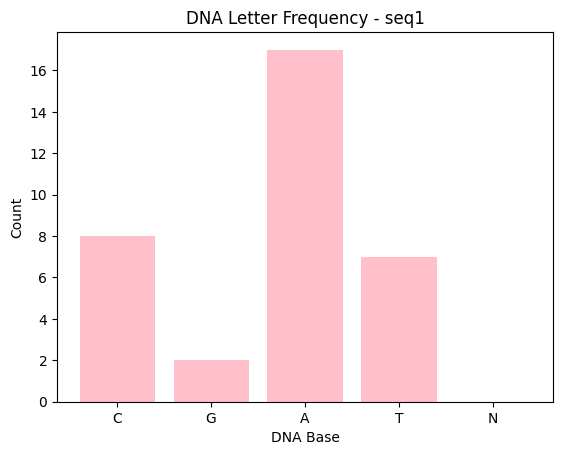

seq2 -> {'C': 4, 'G': 10, 'A': 3, 'T': 7, 'N': 0}


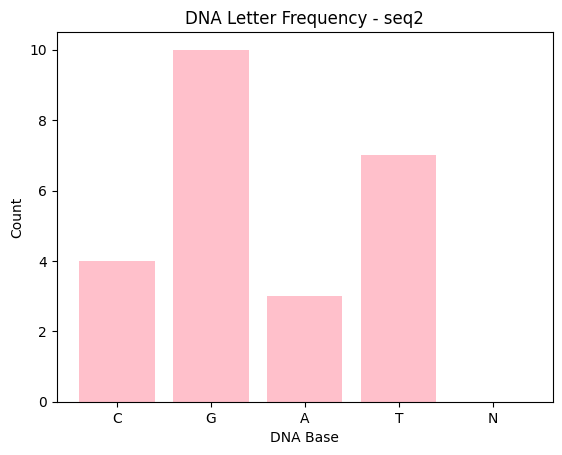

seq3 -> {'C': 16, 'G': 16, 'A': 18, 'T': 10, 'N': 2}


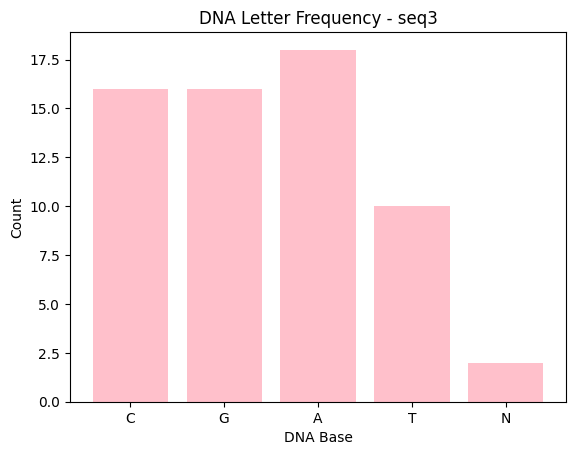

seq4 -> {'C': 11, 'G': 18, 'A': 13, 'T': 10, 'N': 0}


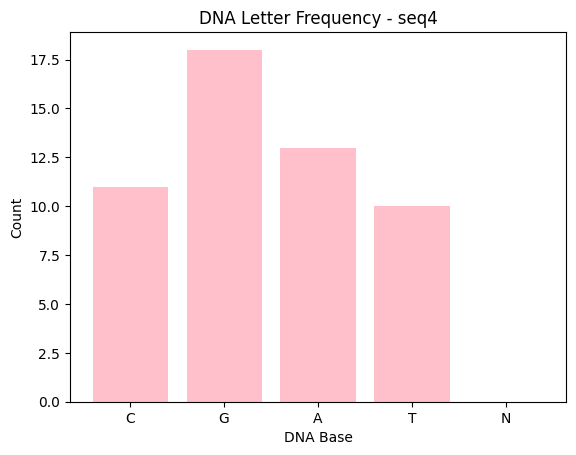

In [38]:
# Make a bar chart of DNA letters for each sequence

for seq_name, seq_data in sequences.items():
    counts = {base: seq_data.count(base) for base in ["C", "G", "A", "T", "N"]}
    print(f"{seq_name} -> {counts}")
    plt.bar(counts.keys(), counts.values(), color="pink")
    plt.title(f"DNA Letter Frequency - {seq_name}")
    plt.xlabel("DNA Base")
    plt.ylabel("Count")
    plt.show()

### Task 2  (dna_raw_complicated.txt)

In [35]:
# DNA_raw_complicated text
dna_data = """ 
>seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
gaattcgcacca
AATAAAACCTCACCCAT
agagcccagaatttactcCCC
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca
gaattcgcacca 
"""

In [36]:
# import liabraries and 'Counter' helps to count letters
# 'matplotlib' for bar chart
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
# Creating a function to read a DNA file that have multi-line sequences
def read_dna_multiline(filename):
    """ 
    This function reads a DNA file in Fasta format (lines starting with '>')
    and handle case where sequences have a multiple lines.
    Returns a dictionary: {sequence_name: full_sequence}
    """
    dna_data ={}    # store {seq_name: seq_str}
    current_name = "Unknown"   # keep tracking with sequence
    dna_data[current_name] = ""

In [38]:
dna_data = read_dna_multiline(filename)
print("DNA data read:", dna_data)

DNA data read: None


In [ ]:
with open(filename, 'r') as file:
    for line in file:
        line = line.strip()   # Remove spaces or new lines
        if not line:
            continue   # skip empty lines
        if line.startswith('>'):
            # Its a new sequence name
            current_name = line[1:]   # remove '>'
            dna_data[current_name] = ''  # start an empty string for this sequence
        else:
            # This line is part of the DNA sequence
            # Add uppercase 
            dna_data[current_name] += line.upper()

return dna_data

In [ ]:
# Creating a function to count DNA letters (C, G, T, A, N)
def count_dna_bases(dna_data):
    """ 
    Take a dictionary of {name: sequence} and return another dictionary {name: {base: count}}
    """
    results = {}
    for name, seq in dna_data.items():
        results[name] = dict(Counter(seq))   # store the counts for sequence
    return results

In [34]:
# Creating a function to plot the counts for each sequence
def plot_dna_counts(dna_counts):
    """ 
    for each DNA sequence, draw a bar chart showing C, G, T, A, N counts.
    """
    for name, counts in dna_counts.items():
        plt.figure(figsize=(5, 3))
        plt.bar(counts.keys(), counts.values(), color='blue')
        plt.title(f"DNA Letter counts - {name}")
        plt.xlabel("DNA Letters")
        plt.ylabel("Frequency")
        plt.show()

In [ ]:
# use the functions together...
filename = "dna_raw_complicated.txt"
# Read the DNA data 
dna_data = read_dna_multiline(filename)

# Count the letters for each sequence
dna_counts = count_dna_bases(dna_data)

# Print the counts nicely
for name, counts in dna_counts.items():
    print(f"\n{name}:")
    for base, count in counts.items():
        print(f" {base}: {count}")

plot_dna_counts(dna_counts)